### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [4]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
print(reviews.shape)
print(reviews.dtypes)
reviews

(2000, 11)
gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [5]:
# Any missing values?
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [7]:
# Explore the data.
reviews['platform'].value_counts().head(15)

Web    2000
Name: platform, dtype: int64

In [6]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [81]:
# Drop unnecessary columns.
reviews_new=reviews.drop(labels=['language','platform'], axis=1)


# View column names.
print(reviews_new.columns)

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')


## 3. Rename columns

In [82]:
# Rename the column headers.
reviews_new.rename(columns={'remuneration (k£)': 'rem(k£)', 'spending_score (1-100)': 's_s', 'loyalty_points':'l_p'},
                            inplace=True)

# View column names.
print(reviews_new.columns)

Index(['gender', 'age', 'rem(k£)', 's_s', 'l_p', 'education', 'product',
       'review', 'summary'],
      dtype='object')


## 4. Save the DataFrame as a CSV file

In [83]:
# Create a CSV file as output.
reviews_new.to_csv('reviews_new.csv', index=False)

In [84]:
# Import new CSV file with Pandas.
reviews_final=pd.read_csv('reviews_new.csv')

# View DataFrame.
reviews_final

,gender,age,rem(k£),s_s,l_p,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


## 5. Linear regression

### 5a) spending vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Thu, 25 Aug 2022   Prob (F-statistic):          2.92e-263
Time:                        18:06:45   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

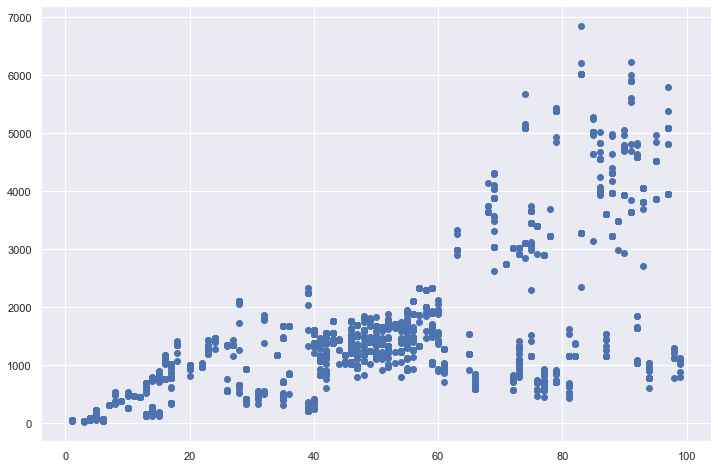

In [85]:
# Dependent variable.
y = reviews_final['l_p']

# Independent variable.
x = reviews_final['s_s']

# Check for linearity.
plt.scatter(x,y) 

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews_final).fit()

test.summary()

In [86]:
# Extract the estimated parameters.
print("Parameters: ", test.params) 

# Extract the standard errors.
print("Standard errors: ", test.bse) 

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [87]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = 33.061693* x + -75.052663	



# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: s_s, Length: 2000, dtype: float64

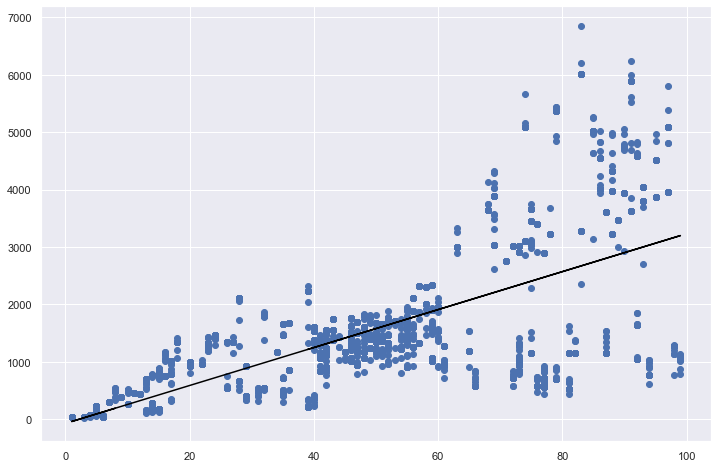

In [88]:
# Plot the graph with a regression line.
import matplotlib.pyplot as plt

# Plot the data points.
plt.scatter(x,y)

# Plot the line.
plt.plot(x,y_pred, color='black')

### 5b) renumeration vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_2   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Thu, 25 Aug 2022   Prob (F-statistic):          2.43e-209
Time:                        18:06:47   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x_2           34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

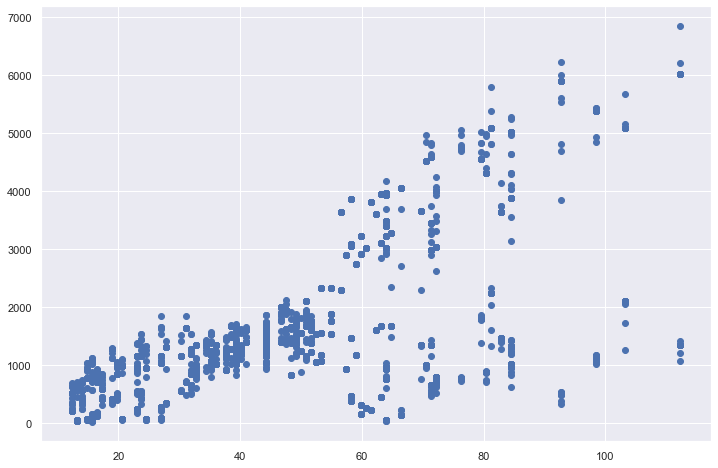

In [89]:
# Dependent variable..
y_2 = reviews_final['l_p']

# Independent variable
x_2 = reviews_final['rem(k£)']

# Check for linearity.
plt.scatter(x_2,y_2) 

# OLS model and summary.
f_2 = 'y_2 ~ x_2'
test_2 = ols(f_2, data = reviews_final).fit()

test_2.summary()

In [90]:
# Extract the estimated parameters.
print("Parameters: ", test_2.params) 

# Extract the standard errors.
print("Standard errors: ", test_2.bse) 

# Extract the predicted values.
print("Predicted values: ", test_2.predict())


Parameters:  Intercept   -65.686513
x_2          34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x_2           0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [91]:
# Set the the X coefficient and the constant to generate the regression table.
y_2pred = 34.187825* x_2 + -65.686513	



# View the output.
y_2pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: rem(k£), Length: 2000, dtype: float64

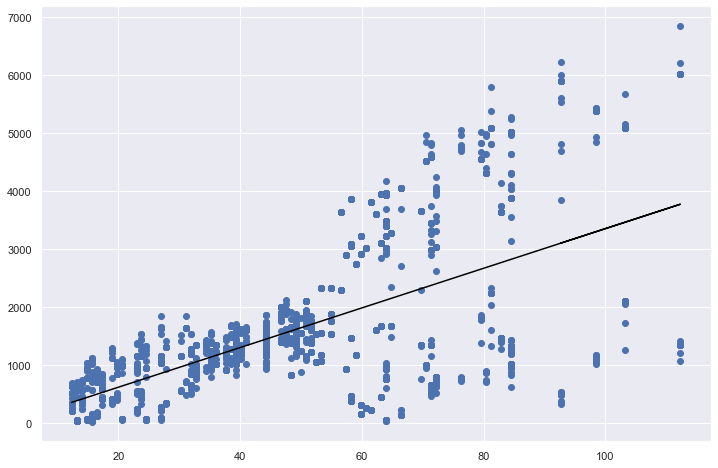

In [92]:
# Plot graph with regression line.
# Plot the data points.
plt.scatter(x_2,y_2)

# Plot the line.
plt.plot(x_2,y_2pred, color='black')

### 5c) age vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_3   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Thu, 25 Aug 2022   Prob (F-statistic):             0.0577
Time:                        18:06:48   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x_3           -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

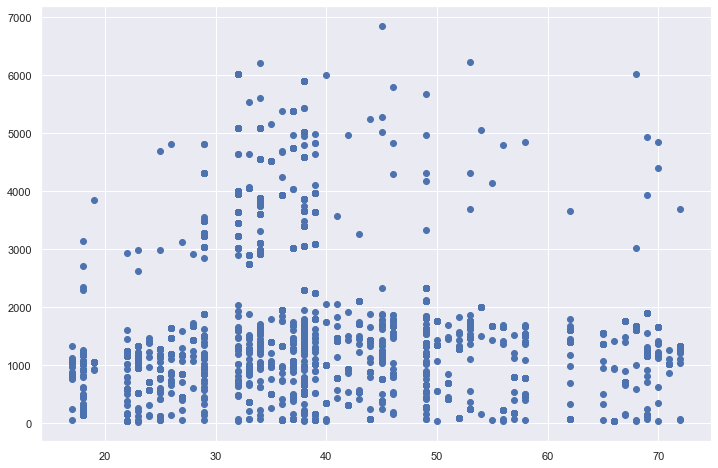

In [93]:
# Dependent variable..
y_3 = reviews_final['l_p']

# Independent variable
x_3 = reviews_final['age']

# Check for linearity.
plt.scatter(x_3,y_3) 

# OLS model and summary.
f_3 = 'y_3 ~ x_3'
test_3 = ols(f_3, data = reviews_final).fit()

test_3.summary()

In [94]:
# Extract the estimated parameters.
print("Parameters: ", test_3.params) 

# Extract the standard errors.
print("Standard errors: ", test_3.bse) 

# Extract the predicted values.
print("Predicted values: ", test_3.predict())



Parameters:  Intercept    1736.517739
x_3            -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x_3           2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [95]:
# Set the the X coefficient and the constant to generate the regression table.
y_3pred = -4.012805* x_3 + 1736.517739	



# View the output.
y_3pred


0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

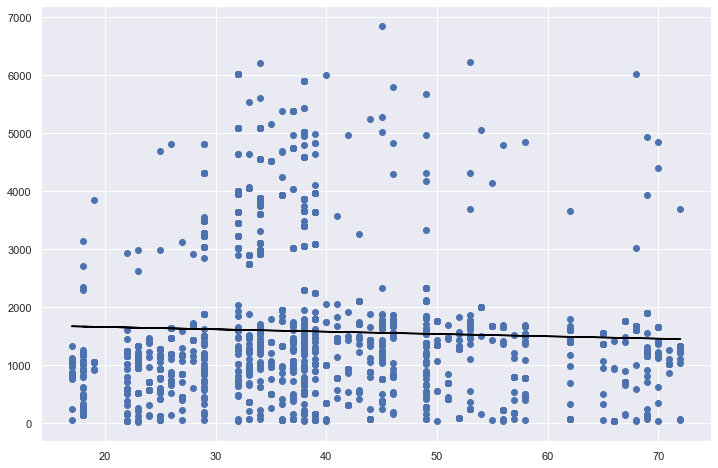

In [96]:
# Plot graph with regression line.

# Plot the data points.
plt.scatter(x_3,y_3)

# Plot the line.
plt.plot(x_3,y_3pred, color='black')

## 6. Observations and insights

***Your observations here...***






What can be clear to see is how suitable spending_score and renumeration are for predicting loyalty points compared to age

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [97]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [98]:
# Load the CSV file(s) as df2.
df= pd.read_csv('reviews_new.csv')

# View DataFrame.
df

,gender,age,rem(k£),s_s,l_p,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [99]:
# Drop unnecessary columns.
df2=df.drop(['gender','age','l_p','education','product','review','summary'], axis=1)

# View DataFrame.
df2

,rem(k£),s_s
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


In [100]:
# Explore the data.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rem(k£)  2000 non-null   float64
 1   s_s      2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [101]:
# Descriptive statistics.
df2.describe()

,rem(k£),s_s
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<AxesSubplot:xlabel='s_s', ylabel='rem(k£)'>

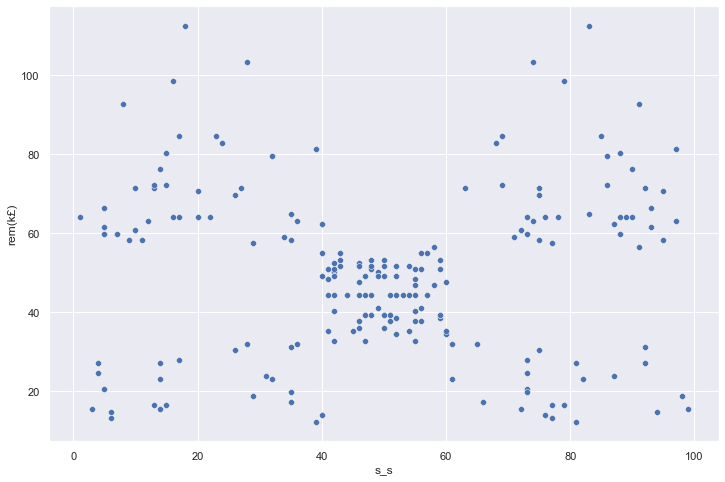

In [102]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='s_s', y='rem(k£)',
                data=df2, )

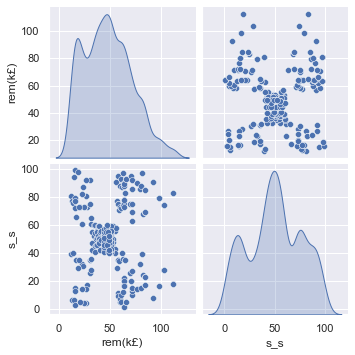

In [103]:
# Create a pairplot with Seaborn.
x = df2[['rem(k£)', 's_s']]

sns.pairplot(df2, vars=x,
              diag_kind= 'kde')

## 3. Elbow and silhoutte methods

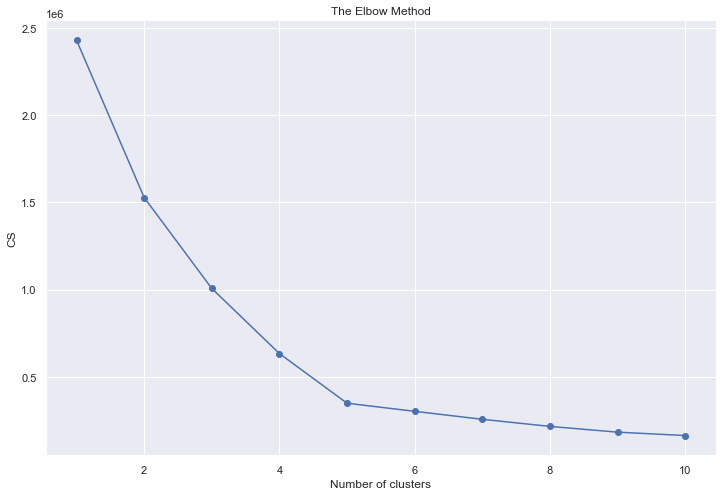

In [104]:
# Determine the number of clusters: Elbow method.
# Elbow chart for us to decide on the number of optimal clusters.
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 500, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")

plt.show()

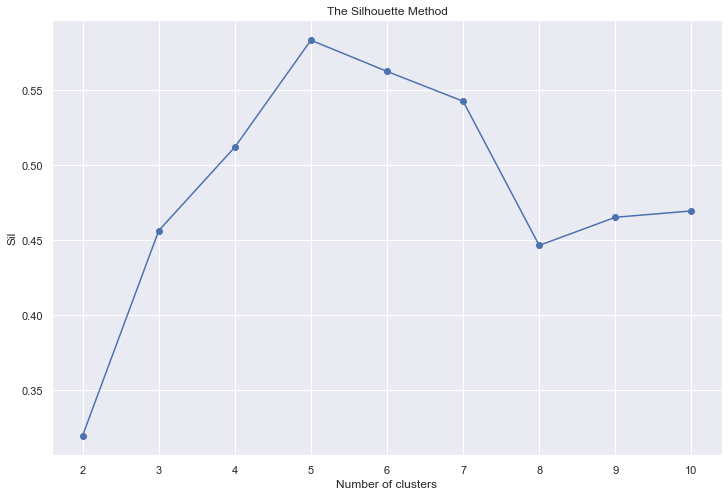

In [105]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

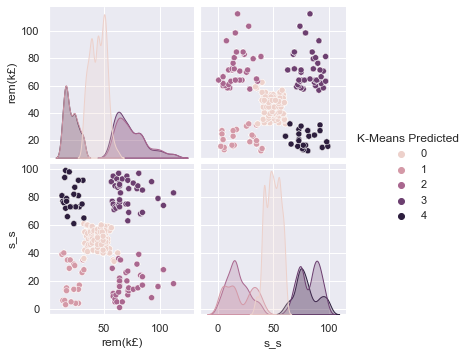

In [106]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

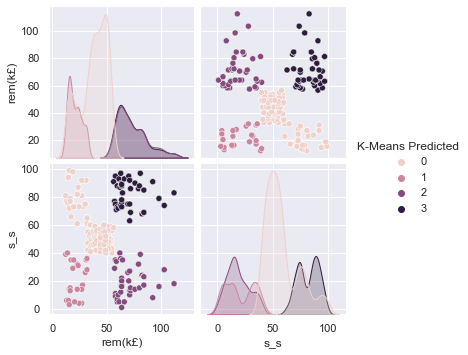

In [107]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

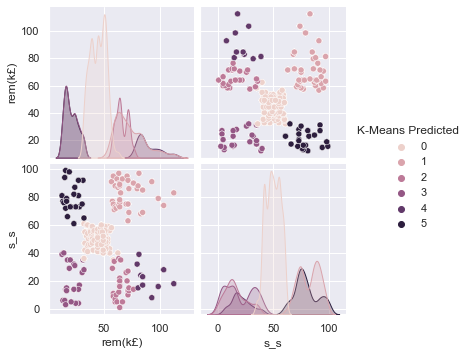

In [108]:
# Use 6 clusters:
kmeans = KMeans(n_clusters = 6, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

## 5. Fit final model and justify your choice

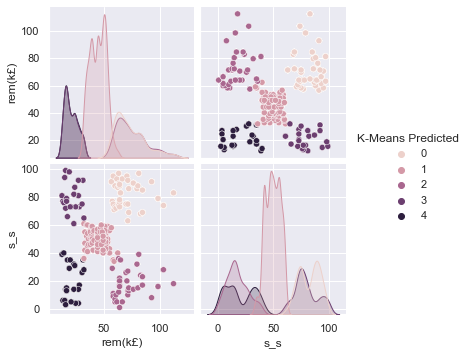

In [109]:
# Apply the final model.
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [110]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()


1    774
0    356
2    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

In [111]:
# View the K-Means predicted.
print(x.head())

   rem(k£)  s_s  K-Means Predicted
0    12.30   39                  4
1    12.30   81                  3
2    13.12    6                  4
3    13.12   77                  3
4    13.94   40                  4


## 6. Plot and interpret the clusters

<AxesSubplot:xlabel='rem(k£)', ylabel='s_s'>

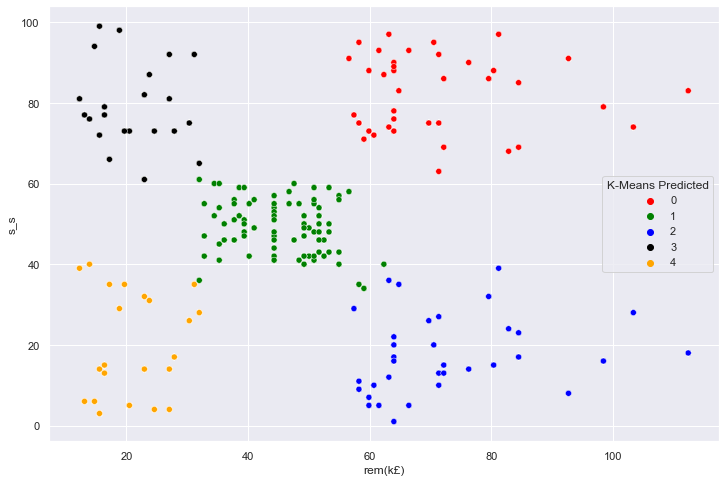

In [112]:
# Visualising the clusters.
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='rem(k£)' , 
                y ='s_s',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])




## 7. Discuss: Insights and observations

***Your observations here...***

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [114]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [115]:
# Load the data set as df3.
df3=df.drop(['gender','age','l_p','education','product','rem(k£)', 's_s'], axis=1)

# View DataFrame.
df3

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [116]:
# Explore data set.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [42]:
# Keep necessary columns. Drop unnecessary columns.


# View DataFrame.


In [43]:
# Determine if there are any missing values.


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [117]:
# Review: Change all to lower case and join with a space.
df3=df3.apply(lambda x: x.astype(str).str.lower())
df3

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*:\n\nyour unpaint...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are f...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap
...,...,...
1995,the perfect word game for mixed ages (with mom...,the perfect word game for mixed ages (with mom
1996,great game. did not think i would like it whe...,super fun
1997,great game for all.........\nkeeps the mind ni...,great game
1998,fun game!,four stars


In [45]:
# Summary: Change all to lower case and join with a space.


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [118]:
# Replace all the punctuations in review column.
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
df3['review']=df3['review'].apply(remove_punctuations)
# View output.

df3

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon master's screen from...
2,nice art nice printing why two panels are fil...,"pretty, but also pretty useless"
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages (with mom
1996,great game did not think i would like it when...,super fun
1997,great game for all\nkeeps the mind nimble,great game
1998,fun game,four stars


In [119]:
# Replace all the puncuations in summary column.
df3['summary']=df3['summary'].apply(remove_punctuations)

# View output.
df3

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when...,super fun
1997,great game for all\nkeeps the mind nimble,great game
1998,fun game,four stars


### 2c) Drop duplicates in both columns

In [120]:
# Drop duplicates in both columns.
df3.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

# View DataFrame.
df3

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when...,super fun
1997,great game for all\nkeeps the mind nimble,great game
1998,fun game,four stars


## 3. Tokenise and create wordclouds

In [121]:
# Create new DataFrame (copy DataFrame).
df4=df3

# View DataFrame.
df4

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when...,super fun
1997,great game for all\nkeeps the mind nimble,great game
1998,fun game,four stars


In [122]:
# Apply tokenisation to both columns.
df4['review']=df4['review'].apply(word_tokenize)
df4['summary']=df4['summary'].apply(word_tokenize)
# View DataFrame.
df4

,review,summary
0,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"
...,...,...
1995,"[the, perfect, word, game, for, mixed, ages, w...","[the, perfect, word, game, for, mixed, ages, w..."
1996,"[great, game, did, not, think, i, would, like,...","[super, fun]"
1997,"[great, game, for, all, keeps, the, mind, nimble]","[great, game]"
1998,"[fun, game]","[four, stars]"


In [123]:
# Review: Create a word cloud.
rtext=df4['review']
word_cloud_review = WordCloud(collocations = False, background_color = 'white').generate(str(rtext))

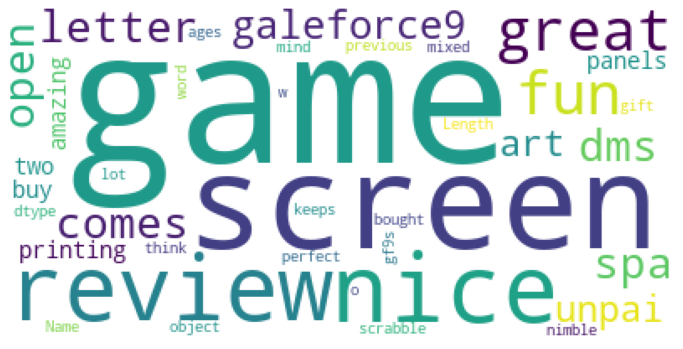

In [124]:
# Review: Plot the WordCloud image.
plt.imshow(word_cloud_review)
plt.axis("off")
plt.show()

In [125]:
# Summary: Create a word cloud.
stext=df4['summary']
word_cloud_summary = WordCloud(collocations = False, background_color = 'white').generate(str(stext))

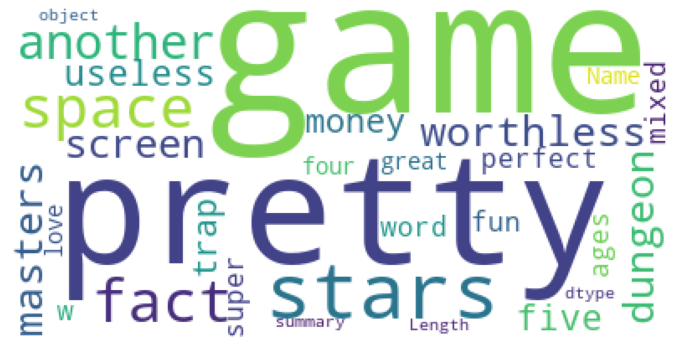

In [126]:
# Summary: Plot the WordCloud image.
plt.imshow(word_cloud_summary)
plt.axis("off")
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [127]:
def unnesting(df, explode):
    idx=df.index.repeat(df[explode[0]].str.len())
    df1=pd.concat([pd.DataFrame({x:np.concatenate(df[x].values)} )for x in explode],axis=1)
    df1.index=idx
    return df1.join(df.drop(explode,1),how='left')
unnesting(df4,['review'])['review'].value_counts()

the        5452
and        3234
to         3164
a          3161
of         2488
           ... 
archers       1
shaman        1
guards        1
snakes        1
nimble        1
Name: review, Length: 7520, dtype: int64

In [128]:
unnesting(df4,['summary'])['summary'].value_counts()

stars          466
five           381
game           319
great          295
the            261
              ... 
socialist        1
capitalisim      1
robots           1
seem             1
mom              1
Name: summary, Length: 1550, dtype: int64

### 4b) Remove alphanumeric characters and stopwords

In [129]:
# Remov all alphanum
df4.replace('\W', '')


,review,summary
0,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"
...,...,...
1995,"[the, perfect, word, game, for, mixed, ages, w...","[the, perfect, word, game, for, mixed, ages, w..."
1996,"[great, game, did, not, think, i, would, like,...","[super, fun]"
1997,"[great, game, for, all, keeps, the, mind, nimble]","[great, game]"
1998,"[fun, game]","[four, stars]"


In [130]:
# Remove all the stopwords
rtext=df4['review']
stext=df4['summary']
# Download the stop words.
nltk.download('stopwords')

# Import the package.
from nltk.corpus import stopwords

# Create a set of English stop words.
stop_words = set(stopwords.words('english'))
df4['review']=df4['review'].apply(lambda x: [item for item in x if item not in stop_words])
df4['summary']=df4['summary'].apply(lambda x: [item for item in x if item not in stop_words])
df4

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\noob\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,summary
0,"[comes, dms, screen, space, screen, absolute, ...","[fact, 50, space, wasted, art, terribly, infor..."
1,"[open, letter, galeforce9, unpainted, miniatur...","[another, worthless, dungeon, masters, screen,..."
2,"[nice, art, nice, printing, two, panels, fille...","[pretty, also, pretty, useless]"
3,"[amazing, buy, bought, gift, new, dm, perfect]","[five, stars]"
4,"[review, gf9s, previous, screens, completely, ...","[money, trap]"
...,...,...
1995,"[perfect, word, game, mixed, ages, mom, perhap...","[perfect, word, game, mixed, ages, mom]"
1996,"[great, game, think, would, like, first, recei...","[super, fun]"
1997,"[great, game, keeps, mind, nimble]","[great, game]"
1998,"[fun, game]","[four, stars]"


### 4c) Create wordcloud without stopwords


In [131]:
# Create a wordcloud without stop words.
rtext=df4['review']
word_cloud_review = WordCloud(collocations = False, background_color = 'white').generate(str(rtext))
stext=df4['summary']
word_cloud_summary = WordCloud(collocations = False, background_color = 'white').generate(str(stext))

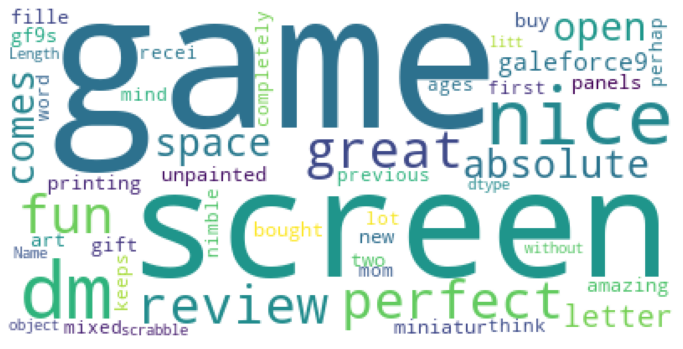

In [132]:
# Plot the wordcloud image.
# Review: Plot the WordCloud image.
plt.imshow(word_cloud_review)
plt.axis("off")
plt.show()

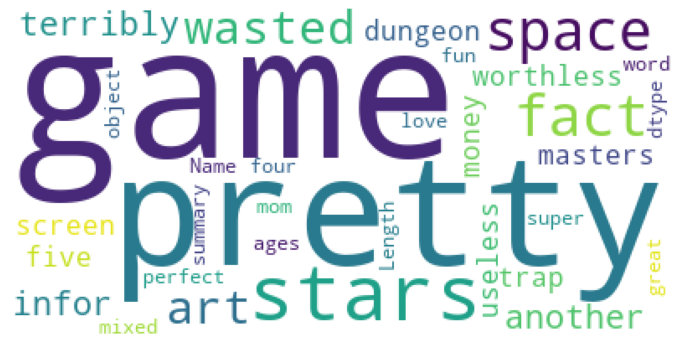

In [133]:
# Summary: Plot the WordCloud image.
plt.imshow(word_cloud_summary)
plt.axis("off")
plt.show()

### 4d) Identify 15 most common words and polarity

In [134]:
# Determine the 15 most common words for review.
unnesting(df4,['review'])['review'].value_counts().head(15)

game      1685
great      596
fun        553
one        530
play       502
like       414
love       331
really     319
get        319
cards      301
tiles      297
good       294
time       291
would      280
book       273
Name: review, dtype: int64

In [135]:
#determining the 15 most common words for summary.
unnesting(df4,['summary'])['summary'].value_counts().head(15)

stars        466
five         381
game         319
great        295
fun          218
love          93
good          92
four          58
like          54
expansion     52
kids          50
cute          45
book          43
one           38
awesome       36
Name: summary, dtype: int64

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [149]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [136]:
# Determine polarity of both columns. 
df4['rsentiment'] = df4['review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df4['rsummary'] = df4['summary'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df4

,review,summary,rsentiment,rsummary
0,"[comes, dms, screen, space, screen, absolute, ...","[fact, 50, space, wasted, art, terribly, infor...",-0.242857,-0.600000
1,"[open, letter, galeforce9, unpainted, miniatur...","[another, worthless, dungeon, masters, screen,...",-0.019468,-0.800000
2,"[nice, art, nice, printing, two, panels, fille...","[pretty, also, pretty, useless]",0.118243,0.000000
3,"[amazing, buy, bought, gift, new, dm, perfect]","[five, stars]",0.578788,0.000000
4,"[review, gf9s, previous, screens, completely, ...","[money, trap]",-0.316667,0.000000
...,...,...,...,...
1995,"[perfect, word, game, mixed, ages, mom, perhap...","[perfect, word, game, mixed, ages, mom]",0.168750,0.200000
1996,"[great, game, think, would, like, first, recei...","[super, fun]",0.158333,0.316667
1997,"[great, game, keeps, mind, nimble]","[great, game]",0.200000,0.200000
1998,"[fun, game]","[four, stars]",-0.050000,0.000000


In [143]:
rtext=df4['review']
text_polarity =\
{" ".join(_) : darth_vader.polarity_scores(" ".join(_)) for _ in rtext}
polarity_pd = pd.DataFrame(text_polarity).T
polarity_pd

,neg,neu,pos,compound
comes dms screen space screen absolute premium fact 50 space wasted art terribly informative needed art well makes completely useless reason gave 2 stars 1 technically speaking least still stand block notes dice rolls drops ball completely,0.285,0.668,0.047,-0.8932
open letter galeforce9 unpainted miniatures bad spell cards great board games meh dm screens however freaking terrible im still waiting single screen isnt polluted pointless artwork useful referenceable tables youve created single use screen useful running storm kings thunder adventure even despite fact geared adventure path usefulness negligible best massive swath inner panel wasted artwork bloated overland map could easily reduced single panel size table nighuseless short stop making crap dm screens,0.184,0.542,0.274,0.8434
nice art nice printing two panels filled general forgotten realms map beyond one blue ocean waste dont understand cant make dm screens useful kinds adventures rather solely specific adventure youre supposed able transpose adventure lands outside forgotten realms even list new monsters npcs would least useful map even would stuff related running game broaduse stuff related giants thing curse strahd make useful raven loft undead horror campaigns general instead huge amount screen space solely mapping castle ravenloft useful small fraction time even curse strahd adventure let alone various ravenloft adventuring really kill extended use screens thinking potential use adventure question well use broader sense rage demons screen far useful broad dark adventuring covering lot rules various conditions may suffer map one panel storm giants one decent tables includes really misses mark maybe ask dms would use,0.181,0.588,0.230,0.7281
amazing buy bought gift new dm perfect,0.000,0.278,0.722,0.8860
review gf9s previous screens completely unnecessary nearly useless skip definition waste money,0.370,0.630,0.000,-0.7063
...,...,...,...,...
retired find great way stay alert spelling vocabulary also need use math keep score great game brain,0.000,0.574,0.426,0.8860
perfect word game mixed ages mom perhaps giving little help 7 yr old ages 80 8 love,0.000,0.464,0.536,0.9137
great game think would like first received turned lot fun play regularly order extra set always travel stuff,0.000,0.532,0.468,0.9062
great game keeps mind nimble,0.000,0.494,0.506,0.6249


In [144]:
stext=df4['summary']
stext_polarity =\
{" ".join(_) : darth_vader.polarity_scores(" ".join(_)) for _ in stext}
spolarity_pd = pd.DataFrame(stext_polarity).T
spolarity_pd


,neg,neu,pos,compound
fact 50 space wasted art terribly informative needed art,0.493,0.507,0.000,-0.7783
another worthless dungeon masters screen galeforce9,0.367,0.633,0.000,-0.4404
pretty also pretty useless,0.275,0.098,0.627,0.5574
five stars,0.000,1.000,0.000,0.0000
money trap,0.697,0.303,0.000,-0.3182
...,...,...,...,...
fun card game people like words,0.000,0.408,0.592,0.7003
sort card game equivalent scrabble lot easier,0.000,0.682,0.318,0.4215
great game keep mind active,0.000,0.306,0.694,0.7783
great mind game,0.000,0.328,0.672,0.6249


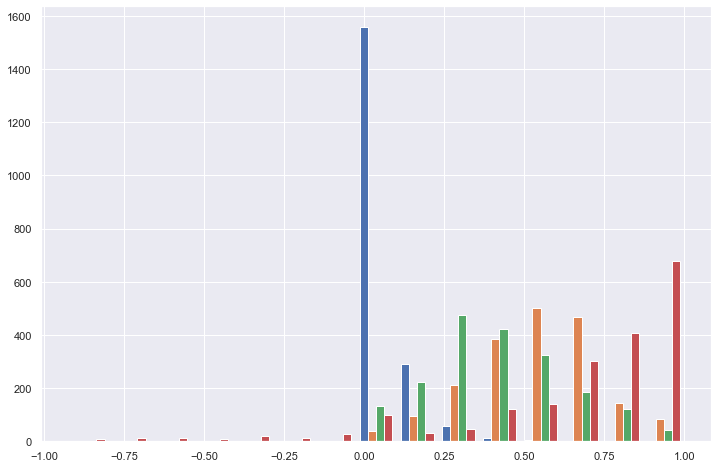

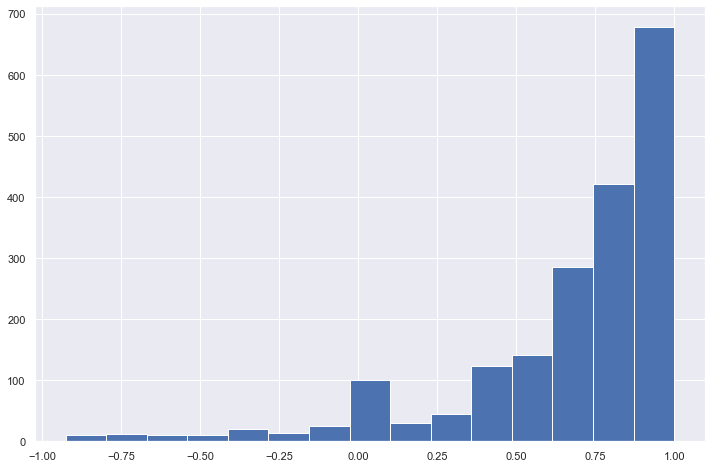

In [146]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
plt.hist(polarity_pd, bins = 15)
plt.show()

# Histogram of sentiment score
plt.hist(polarity_pd['compound'], bins = 15)
plt.show()

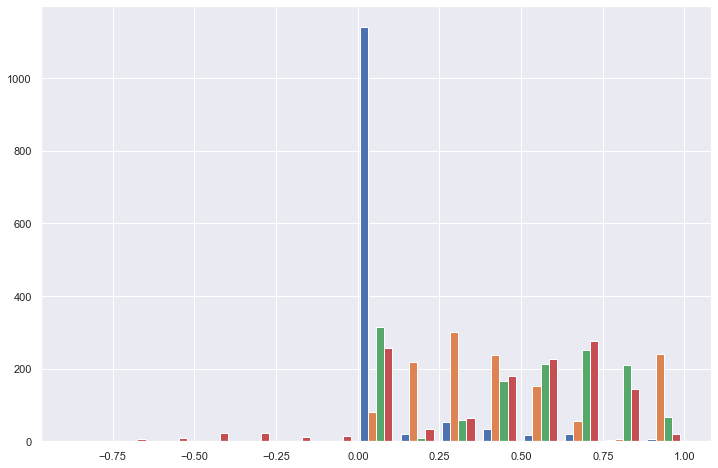

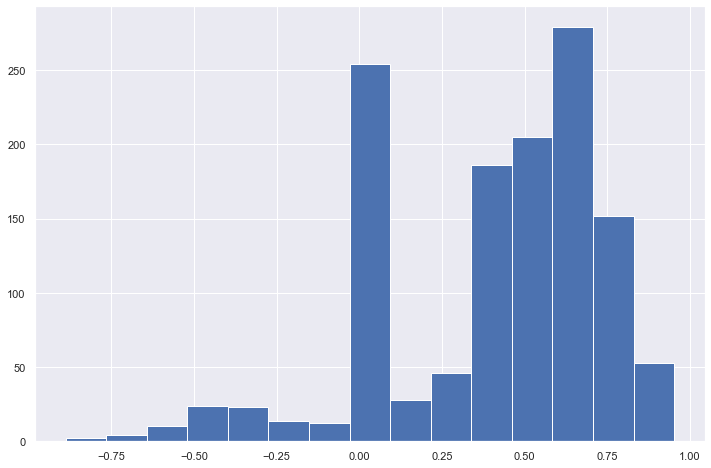

In [147]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
plt.hist(spolarity_pd, bins = 15)
plt.show()

# Histogram of sentiment score
plt.hist(spolarity_pd['compound'], bins = 15)
plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [148]:
# Top 20 negative reviews.
polarity_pd.sort_values('neg', ascending=0).head(20)

# View output.


,neg,neu,pos,compound
difficult,1.000,0.000,0.000,-0.3612
crappy cardboard ghost original hard believe shame hasbro disgusting,0.723,0.157,0.120,-0.8885
incomplete kit disappointing,0.615,0.385,0.000,-0.4939
found directions difficult,0.556,0.444,0.000,-0.3612
8 yearold granddaughter frustrated discouraged attempting craft definitely young child difficulty understanding directions disappointed,0.520,0.359,0.121,-0.8360
got product damaged condition,0.492,0.508,0.000,-0.4404
uno questions anger okay way discuss anger gets repetitive students start get bored half round,0.491,0.427,0.081,-0.8625
doesnt love puppies great instructions pictures fun,0.477,0.286,0.236,-0.5207
rather hard 11 year old alone,0.459,0.541,0.000,-0.3400
bought thinking would really fun disappointed really messy isnt nearly easy seems also glue useless 9 year old instructions difficult,0.455,0.427,0.118,-0.8513


In [149]:
# Top 20 negative summaries.
spolarity_pd.sort_values('neg', ascending=0).head(20)

# View output.


,neg,neu,pos,compound
frustrating,1.000,0.000,0.00,-0.4404
disappointed,1.000,0.000,0.00,-0.4767
meh,1.000,0.000,0.00,-0.0772
boring,1.000,0.000,0.00,-0.3182
disappointing,1.000,0.000,0.00,-0.4939
worn,1.000,0.000,0.00,-0.2960
defective poor qc,0.857,0.143,0.00,-0.7184
bad expecting,0.778,0.222,0.00,-0.5423
uno angry,0.767,0.233,0.00,-0.5106
mad dragon,0.762,0.238,0.00,-0.4939


In [150]:
# Top 20 positive reviews.
polarity_pd.sort_values('pos', ascending=0).head(20)

# View output.


,neg,neu,pos,compound
good,0.0,0.0,1.0,0.4404
super cute,0.0,0.0,1.0,0.7845
perfect,0.0,0.0,1.0,0.5719
love,0.0,0.0,1.0,0.6369
cool,0.0,0.0,1.0,0.3182
fun,0.0,0.0,1.0,0.5106
great,0.0,0.0,1.0,0.6249
fun entertaining,0.0,0.0,1.0,0.7351
super fun,0.0,0.0,1.0,0.8020
cute,0.0,0.0,1.0,0.4588


In [151]:
# Top 20 positive summaries.
spolarity_pd.sort_values('pos', ascending=0).head(20)

# View output.


,neg,neu,pos,compound
fun fun fun,0.0,0.0,1.0,0.8720
adorable,0.0,0.0,1.0,0.4939
entertaining,0.0,0.0,1.0,0.4404
easy play,0.0,0.0,1.0,0.6486
wow,0.0,0.0,1.0,0.5859
thanks,0.0,0.0,1.0,0.4404
pretty cool,0.0,0.0,1.0,0.6705
beautiful,0.0,0.0,1.0,0.5994
nice,0.0,0.0,1.0,0.4215
love play friends,0.0,0.0,1.0,0.8658


## 7. Discuss: Insights and observations

***Your observations here...***

# 